<a href="https://colab.research.google.com/github/FelipePRosa/Data-Science-Projects/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro
<left><img alt="rio de janeiro" width="60%" src="https://image.freepik.com/fotos-gratis/paisagem-do-rio-de-janeiro-cercada-pelo-mar-sob-um-ceu-azul-no-brasil_181624-14153.jpg"></left>

*by [Felipe Rosa](https://www.linkedin.com/in/felipe-pimentel-rosa-19975b10b/)*<br>
*Blog: [Medium](https://medium.com/@felipepimentelrosa)*

---
<br>

A violência no Brasil sempre foi um fator preocupante e com índices evolutivos ao longo da história. O fato é que ela atinge todas cidades e vem ganhando cada vez mais notoriedade nos noticiários.

Em dados gerais, o Rio de Janeiro não se encontra nas posições mais elevadas de indíces de violência, como por exemplo taxa de homicídio a cada 100 mil habitantes na capital (24ª posição das 27 capitais) e no estado (18ª posição no ranking), segundo os dados do Datasus para 2015.

Por outro lado, em um ranking das taxas de homicídio por
cem mil habitantes dos municípios das periferias das Regiões
Metropolitanas do Rio, São Paulo e Belo Horizonte, 15 dos 20
municípios da metrópole carioca estão entre os 25 municípios com
maiores taxas de homicídio. Isso pelo fato do Rio de Janeiro viver um ciclo vicioso de desigualdade, violência e desenvolvimento desde 1970.

De 2013 para 2016, o estado que se localizava na 8ª posição das 27 capitais brasileiras, em comparativos de renda pública per capita, caiu 9 posições, ocupando agora a 17ª no ranking.

## Obtenção dos Dados

As leis de divulgação e transparência de dados e acesso à informação, combinado com a conscientização da população e dos órgãos públicos, proporcionam a disserminação e a disponibilização de diversas fontes de dados relevantes para a população, e cruciais para uma análise mais aprofundada.

O [portal ISPDados](http://www.ispdados.rj.gov.br/) do Rio de Janeiro é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro e trás essas informações de forma aberta.

<left><img alt="ISPDados" width="20%" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNoWJigYVYIMmSvg_p9emC07albOaIfLSukA&usqp=CAU"></left>

Todos os dados registrados pelo ISP são recorrentes de Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro.

Para validação das informações inseridas no banco de dados, os Registros de Ocorrência antes são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). Dessa forma as estatísticas apresentadas no banco de dados disponibilizado pela ISPDados são organizadas por data do registro, além de diversas outras informações que serão abordadas ao longo deste documento. 

In [2]:
### Importando os dados
import pandas as pd
import numpy as np

df = pd.read_csv("http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv", sep=';')

In [3]:
# Tamanho do dataset
print('Quantidade de Registros de Ocorrência :',df.shape[0])
print('Quantidade de Informação por RO :',df.shape[1])

Quantidade de Registros de Ocorrência : 362
Quantidade de Informação por RO : 56


In [4]:
# Últimos Registros de Ocorrência
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,,,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,,,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,,,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,,,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,,,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,3


In [6]:
# Primeiros Registros de Ocorrência
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
357,2020,10,277,2,5,284,145,429,404,4601,452,175,1834,3971,1277,768,6016,1898,357,290,49,0,0,6,52,15,1240,9923,1058,813,431,1005,157,5866,9330,0,105,11,4593,2019,972,910,173,1212,2787,369,993,37,4194,297,24,4,2,0,50772,3
358,2020,11,325,2,8,335,81,416,401,4619,467,183,1769,3763,1301,707,5771,2082,331,273,71,1,2,7,64,12,1294,9908,1052,837,395,1017,148,5402,8851,1,107,7,3723,1738,803,820,147,1273,2629,381,642,37,4055,316,19,3,1,1,47940,3
359,2020,12,283,3,8,294,84,378,321,4666,424,192,1651,3542,1272,712,5526,2300,459,324,75,0,4,6,68,24,1369,10155,1111,807,318,1018,157,5509,8920,0,112,5,3541,1709,784,827,133,1190,2673,360,906,40,4116,308,20,0,1,1,47841,3
360,2021,1,361,2,13,376,149,525,479,5325,469,168,1666,4003,1410,1023,6436,2332,363,297,91,0,10,6,70,41,1413,11059,1183,850,355,1100,160,5704,9352,0,114,5,3906,1823,796,909,153,1303,2924,444,808,50,4857,383,35,4,0,0,52352,2
361,2021,2,246,4,12,262,147,409,333,4489,413,150,1495,3964,1337,981,6282,2172,351,325,80,0,10,7,53,26,1343,10649,1158,735,366,1023,140,5629,9051,0,117,10,4185,1664,681,875,136,1232,2860,353,820,34,4121,293,24,5,2,0,49018,2


In [19]:
# Informação do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         362 non-null    int64 
 1   mes                         362 non-null    int64 
 2   hom_doloso                  362 non-null    int64 
 3   lesao_corp_morte            362 non-null    object
 4   latrocinio                  362 non-null    int64 
 5   cvli                        362 non-null    object
 6   hom_por_interv_policial     362 non-null    object
 7   letalidade_violenta         362 non-null    int64 
 8   tentat_hom                  362 non-null    int64 
 9   lesao_corp_dolosa           362 non-null    int64 
 10  estupro                     362 non-null    object
 11  hom_culposo                 362 non-null    object
 12  lesao_corp_culposa          362 non-null    object
 13  roubo_transeunte            362 non-null    int64 

Vendo que várias das variáveis estão em formato `object`, devemos alterar para valores numéricos para que possamos realizar os comparativos da análise.

In [5]:
# Conversão dos valores
for col in df:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [39]:
#Porcentagem de valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

furto_bicicleta               76.243094
roubo_bicicleta               76.243094
posse_drogas                  49.723757
cmba                          49.723757
cmp                           49.723757
aaapai                        49.723757
apf                           49.723757
apreensao_drogas_sem_autor    49.723757
trafico_drogas                49.723757
roubo_cx_eletronico           39.779006
roubo_apos_saque              39.779006
extorsao                      39.779006
sequestro_relampago           39.779006
estelionato                   39.779006
roubo_conducao_saque          39.779006
furto_celular                 39.779006
furto_coletivo                39.779006
estupro                       39.779006
pol_militares_mortos_serv     39.779006
pol_civis_mortos_serv         39.779006
pessoas_desaparecidas         36.464088
encontro_ossada               36.464088
roubo_celular                 29.834254
lesao_corp_culposa            26.519337
registro_ocorrencias          26.519337


Os valores onde não se tinha informação foram tradados como vazios ou zerados, mas nunca nulos. Com isso analisado, podemos começar a verificar as informações distribuidas.
Analisando a distribuição dos valores vazios e zerados, podemos verificar que a ausência de tais valores é por motivo de essas variáveis terem sido incluídas após a criação da base de dados, como pode ser conferido abaixo onde os valores ausêntes não são randômicos pelo dataset.

In [40]:
# Análise da disperção dos valores
df.set_index('ano').isna().sum(level=0).drop(columns=['mes','hom_doloso','latrocinio','letalidade_violenta','tentat_hom','roubo_transeunte','roubo_em_coletivo','roubo_rua',
                                                      'roubo_veiculo','roubo_carga','roubo_comercio','lesao_corp_dolosa','roubo_residencia','roubo_banco'])

,lesao_corp_morte,cvli,hom_por_interv_policial,estupro,hom_culposo,lesao_corp_culposa,roubo_celular,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1992,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1993,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1994,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1995,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1996,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1997,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1998,12,12,0,12,0,12,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1999,0,0,0,12,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,0,12,12,12,0,12,12,12,0,12,12,12,12,0,12,0,12,12,12,0,0


Seguindo com a análise anterior, pode-se reparar por exemplo que os registros de furto de bicilceta começaram em meados de 2015, como pode ser melhor analisado abaixo.

In [52]:
# Verificação do primeiro registro de roubo de bicicleta
df[['ano','mes','roubo_bicicleta']].drop(df[df.roubo_bicicleta.isnull()].index | df[df.roubo_bicicleta==0.0].index)

,ano,mes,roubo_bicicleta
293,2015,6,3.0
294,2015,7,24.0
295,2015,8,17.0
296,2015,9,21.0
297,2015,10,19.0
...,...,...,...
357,2020,10,15.0
358,2020,11,12.0
359,2020,12,24.0
360,2021,1,41.0


Usando o método `describe()` podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.


In [38]:
# Resumo estatístico do DataFrame 
df.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,362.000000,362.000000,362.000000,266.000000,362.000000,266.000000,278.000000,362.000000,362.000000,362.00000,218.000000,278.000000,266.000000,362.000000,254.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,218.000000,218.000000,218.000000,86.000000,362.000000,362.000000,362.000000,362.000000,218.000000,218.000000,86.000000,362.000000,362.000000,266.000000,218.000000,218.000000,218.000000,362.000000,182.000000,182.000000,182.000000,362.00000,182.000000,182.000000,182.000000,182.000000,266.000000,230.000000,362.000000,230.000000,218.000000,218.000000,266.000000,362.000000
mean,2005.585635,6.472376,494.488950,4.259398,15.290055,467.868421,74.820144,570.367403,321.005525,5443.10221,373.738532,208.960432,3292.349624,3460.886740,997.614173,668.908840,4829.779006,2442.038674,345.162983,447.198895,130.022099,8.955801,3.669725,10.922018,139.678899,12.418605,1222.361878,9521.372928,1646.701657,1494.024862,629.963303,1420.325688,133.476744,5999.892265,10407.033149,0.635338,131.504587,7.830275,2376.559633,1105.519337,623.258242,771.565934,182.005495,1755.81768,2353.835165,552.291209,1241.379121,85.587912,5430.857143,425.517391,64.138122,3.286957,2.022936,0.334862,53660.597744,2.994475
std,8.719680,3.467388,119.674055,2.714810,5.996431,97.134305,38.683339,108.559061,125.456529,1506.12915,93.515668,54.043857,879.838554,2418.389211,628.673540,298.420756,3176.742072,779.447612,220.181563,122.662789,45.645443,10.467109,2.676248,6.353516,56.985709,8.442839,783.604304,4520.486745,313.385781,961.721216,270.807409,395.914201,77.721180,1932.365042,3647.947418,0.942954,42.218899,4.979553,910.466943,645.296716,242.221086,299.705000,37.110928,648.93764,630.249170,241.316069,363.937998,68.724452,1148.266823,74.022463,34.889501,2.245870,1.731898,0.631562,10934.766424,0.074226
min,1991.000000,1.000000,239.000000,0.000000,2.000000,249.000000,10.000000,297.000000,122.000000,2350.00000,188.000000,111.000000,584.000000,688.000000,0.000000,281.000000,1086.000000,1097.000000,59.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,23.000000,305.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,106.000000,729.00000,1173.000000,225.000000,544.000000,2.000000,1409.000000,178.000000,0.000000,0.000000,0.000000,0.000000,30621.000000,2.000000
25%,1998.000000,3.000000,397.000000,2.000000,11.000000,389.500000,43.000000,490.500000,202.000000,4072.75000,289.000000,174.000000,2931.750000,1069.500000,560.750000,437.250000,1621.750000,1886.000000,212.250000,356.250000,98.000000,2.000000,2.000000,6.000000,89.250000,5.500000,822.250000,5328.500000,1413.000000,726.750000,436.250000,1244.750000,103.750000,4027.750000,6717.500000,0.000000,107.000000,5.000000,1718.750000,734.000000,387.500000,476.250000,154.000000,1240.50000,1740.500000,341.500000,942.250000,44.000000,4788.250000,384.000000,39.000000,2.000000,1.000000,0.000000,45455.750000,3.000000
50%,2006.000000,6.000000,499.000000,4.000000,15.000000,474.000000,71.500000,582.500000,324.500000,5696.00000,390.500000,198.500000,3319.000000,3300.000000,762.500000,600.000000,4539.000000

### Crimes Contra o Patrimônio - Veículos

Vamos dedicar essa seção do projeto para investigar dados em relação aos crimes de roubo e furto de veículos.

Problema comum nas grandes metrópoles brasileiras, esse tipo de crime merece destaque em nosso projeto. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [6]:
# Visualização de ocorrências de furto/roubo de veículo e recuperação
df['perda_veiculos_total'] = df.roubo_veiculo + df.furto_veiculos
df['porcentagem_recuperacao'] = round((df.recuperacao_veiculos / df.perda_veiculos_total)*100,2)

print('Média de veículos perdidos por mês: {:.2F}'.format(df.roubo_veiculo.mean()+df.furto_veiculos.mean()))
print('Média de veículos recuperados por mês: {:.2F}'.format(df.recuperacao_veiculos.mean()))

print('Porcentagem dos veículos recuperados por mês: ', round(df.recuperacao_veiculos.mean()/(df.roubo_veiculo.mean()+df.furto_veiculos.mean())*100,2), '%')

Média de veículos perdidos por mês: 4088.74
Média de veículos recuperados por mês: 1755.82
Porcentagem dos veículos recuperados por mês:  42.94 %


In [ ]:
# Meses com mais roubos e furtos somados
df[['ano','mes','roubo_veiculo','furto_veiculos','perda_veiculos_total','recuperacao_veiculos','porcentagem_recuperacao']].sort_values(by=['roubo_veiculo']+['furto_veiculos'], ascending=False)

,ano,mes,roubo_veiculo,furto_veiculos,perda_veiculos_total,recuperacao_veiculos,porcentagem_recuperacao
326,2018,3,5358,1249,6607,3450,52.22
324,2018,1,5286,1264,6550,3695,56.41
314,2017,3,5002,1428,6430,2932,45.60
318,2017,7,4951,1206,6157,3476,56.46
315,2017,4,4891,1289,6180,3481,56.33
...,...,...,...,...,...,...,...
7,1991,8,1347,1835,3182,809,25.42
68,1996,9,1312,1637,2949,790,26.79
2,1991,3,1265,2084,3349,789,23.56
0,1991,1,1174,2009,3183,872,27.40


In [53]:
# Ano e mês com maior quantidade de roubos de carro
df[df.roubo_veiculo == df.roubo_veiculo.max()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
326,2018,3,508,6.0,20,534.0,109.0,643,553,5473,452.0,171.0,2308.0,7638,2183.0,1385,11206,5358,918,638,115,2,5.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,66035.0,3


In [54]:
# Ano e mês com menor quantidade de roubos de carro
df[df.roubo_veiculo == df.roubo_veiculo.min()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3


### Crimes Contra a Vida

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.

In [ ]:
print("Min:\t{}".format(df.hom_doloso.max()))
print("Max:\t{}".format(df.hom_doloso.min()))

Min:	831
Max:	239


In [ ]:
# Mês com maior quantidade de homicídios dolosos
df[df.hom_doloso == df.hom_doloso.max()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,perda_veiculos_total,porcentagem_recuperacao
48,1995,1,831,,17,,,848,166,3626,,,,1056,,377,1433,2060,188,323,174,38,,,,NaN,134,4350,1924,520,,,,2941,5385,,,,,147,,,,1435,,,,,,,98,,,,,3,3984,36.02


In [ ]:
# Mês com menor quantidade de homicídios dolosos
df[df.hom_doloso == df.hom_doloso.min()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,perda_veiculos_total,porcentagem_recuperacao
356,2020,9,239,3,7,249,54,303,343,4560,481,171,1675,3567,1319,582,5468,1742,323,294,61,0,4,2,57,27.0,1146,9124,1065,698,379,823,132,5888,8985,1,105,5,4086,1984,974,890,150,1173,2497,455,1059,37,4094,297,22,1,0,0,48732,3,2807,41.79


In [8]:
# Meses com mais atentados à vida
df['atentado_a_vida'] = (df.hom_doloso + df.tentat_hom + df.hom_culposo)
df[['hom_culposo','hom_doloso','tentat_hom']] = df[['hom_culposo','hom_doloso','tentat_hom']].fillna(0.0)
df[['ano','mes','hom_doloso','hom_culposo','tentat_hom','atentado_a_vida']].sort_values(by=['hom_doloso'], ascending=False)

,ano,mes,hom_doloso,hom_culposo,tentat_hom,atentado_a_vida
48,1995,1,831,0.0,166,997.0
47,1994,12,826,0.0,196,1022.0
49,1995,2,814,0.0,179,993.0
51,1995,4,788,0.0,170,958.0
52,1995,5,784,0.0,149,933.0
...,...,...,...,...,...,...
355,2020,8,261,162.0,354,777.0
353,2020,6,259,143.0,307,709.0
354,2020,7,257,165.0,377,799.0
361,2021,2,246,150.0,333,729.0


Acima, podemos identificar a taxa de decaimento dos homicídios dolosos pela variável `hom_doloso` ao longo do período observado no dataset.

Da mesma forma é possível observar um crescimento nos homicídios culposos e nas tentativas de homicídio, identificado pelas coluna `hom_culposo` e `tentat_hom` respectivamente.

Estes são dados interessantes já que os índices no geral de atentado à vida praticamente se mantiveram. A mudança se deu no aumento de tentativas principalmente, porém na queda dos homicídios dolosos.

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável `hom_doloso`.


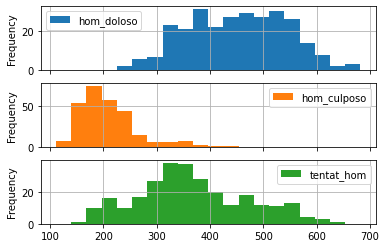

In [82]:
# Plotar histogramas separados
df[['hom_doloso','hom_culposo','tentat_hom']].drop(df[df.hom_culposo==0.0].index).plot(kind='hist', bins=20, grid=True, subplots=True);

Média de Homicídios Dolosos: 494.5
Média de Homicídios Culposos: 209.0
Média de Tentativas de Homicídio: 321.0


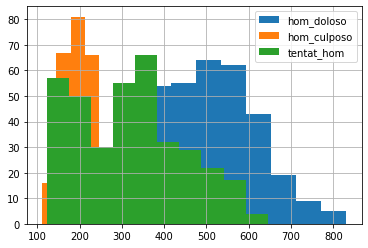

In [25]:
# Plotar histograma conjunto
print('Média de Homicídios Dolosos: {:.4}'.format(df.hom_doloso[df.hom_doloso!=0.0].mean()))
print('Média de Homicídios Culposos: {:.4}'.format(df.hom_culposo[df.hom_culposo!=0.0].mean()))
print('Média de Tentativas de Homicídio: {:.4}'.format(df.tentat_hom[df.tentat_hom!=0.0].mean()))
df.hom_doloso[df.hom_doloso!=0.0].hist(legend=True);
df.hom_culposo[df.hom_culposo!=0.0].hist(legend=True);
df.tentat_hom[df.tentat_hom!=0.0].hist(legend=True);

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo, que abrange a média encontrada acima.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.

Por último, vamos analisar as variáveis de roubos ocorridos ao longo dos anos utilizando um gráfico de linha.

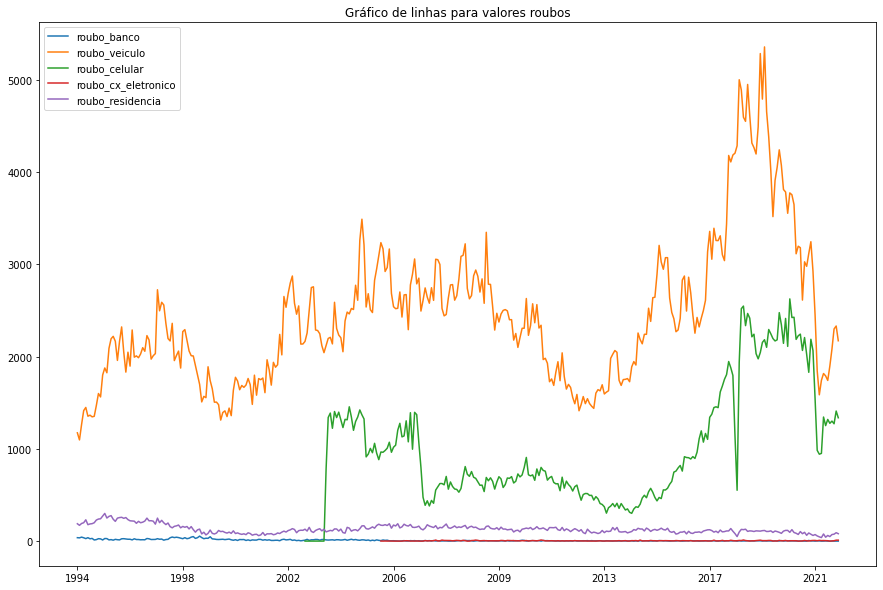

In [107]:
# Plotar gráfico de linhas para os roubos
df['roubo_celular'] = pd.to_numeric(df['roubo_celular'], errors='coerce')
df['roubo_cx_eletronico'] = pd.to_numeric(df['roubo_cx_eletronico'], errors='coerce')
df['roubo_residencia'] = pd.to_numeric(df['roubo_residencia'], errors='coerce')
ax = df.roubo_banco.plot(legend=True, x_compat=True, figsize=(15,10), title='Gráfico de linhas para valores roubos');
df.roubo_veiculo.plot(legend=True);
df.roubo_celular.plot(legend=True);
df.roubo_cx_eletronico.plot(legend=True);
df.roubo_residencia.plot(legend=True);
ax.set_xticklabels(df.ano[::int(round(df.shape[0]/8,0))]);

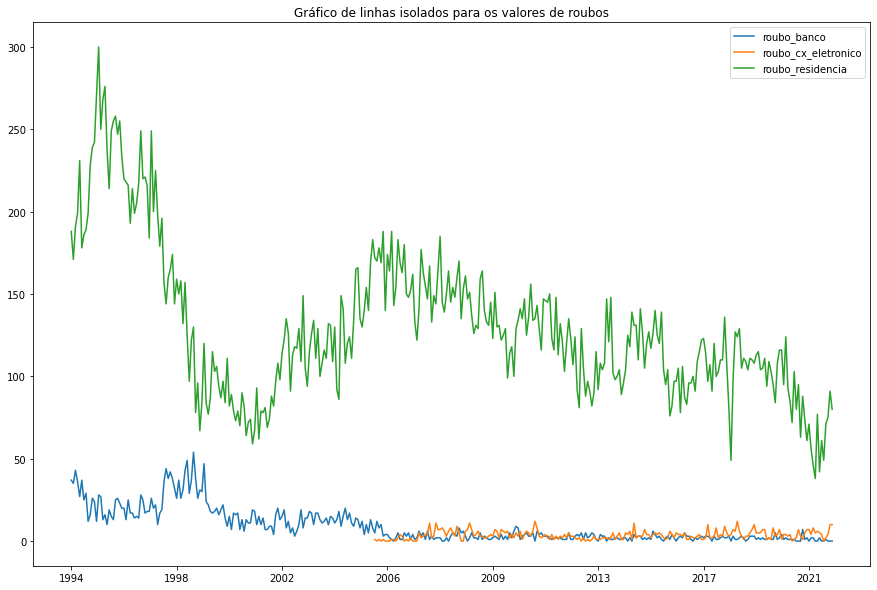

In [118]:
# plotar gráfico de linhas isolados para os valores menores
ax = df.roubo_banco.plot(legend=True, figsize=(15,10) ,title='Gráfico de linhas isolados para os valores de roubos');
df.roubo_cx_eletronico.plot(legend=True);
df.roubo_residencia.plot(legend=True);
ax.set_xticklabels(df.ano[::int(round(df.shape[0]/8,0))]);

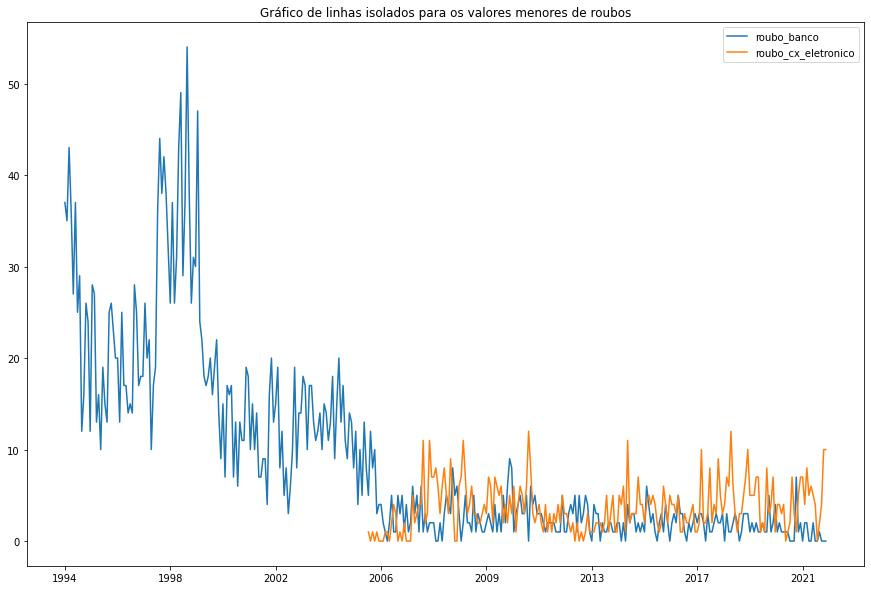

In [119]:
# plotar gráfico de linhas isolados para os valores menores
ax = df.roubo_banco.plot(legend=True, figsize=(15,10), title='Gráfico de linhas isolados para os valores menores de roubos');
df.roubo_cx_eletronico.plot(legend=True);
ax.set_xticklabels(df.ano[::int(round(df.shape[0]/8,0))]);

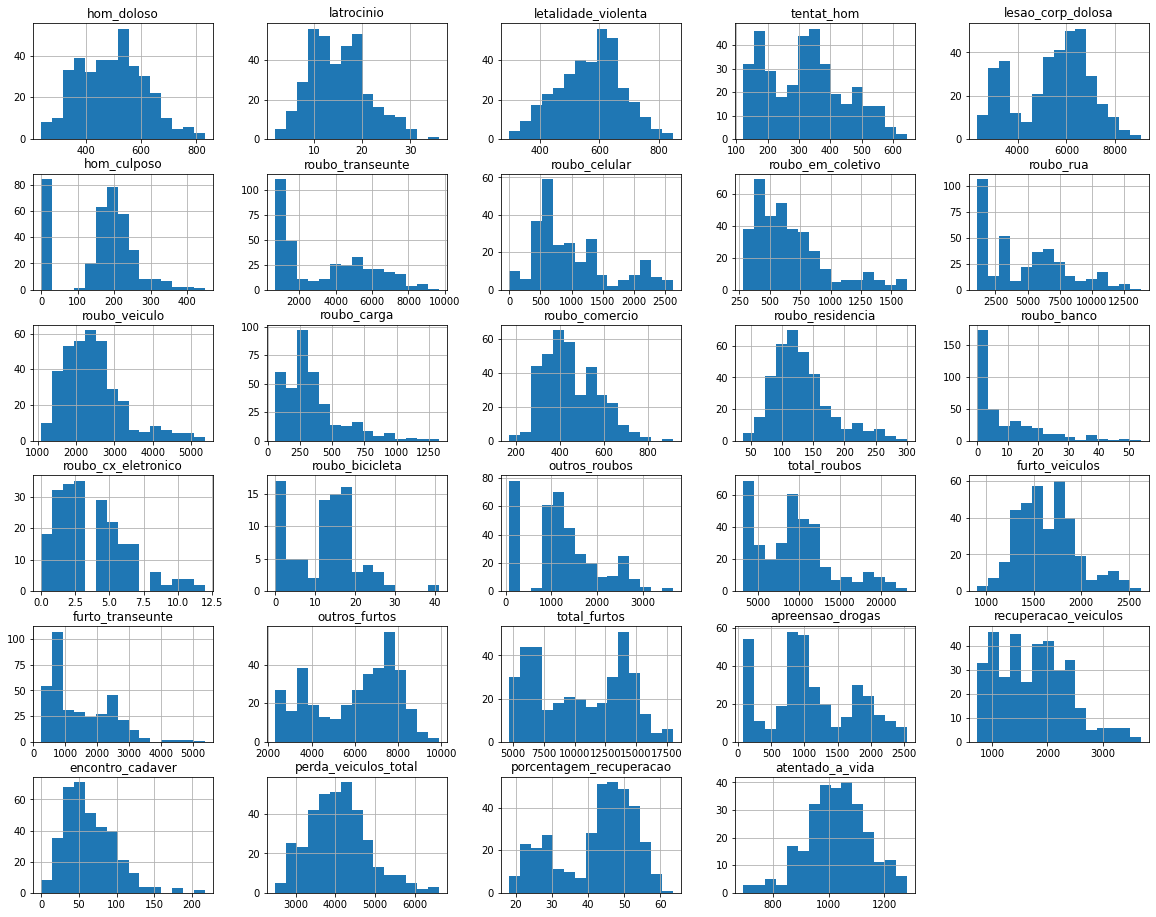

In [ ]:
df.drop(columns=['ano','mes', 'fase']).hist(bins=15, figsize=(20,16));

## Conclusão

A princípio deve ser levado em consideração de que as informações apresentadas no banco de dados em questão são referentes aos Registros de Ocorrência relatados na Polícia Civil. Logo, não há como realizar uma análise absoluta e perfeita de todas as ocorrências no Rio de Janeiro.

Os dados não apresentaram nenhum outlier **nítido**, mostrando uma boa coerência e levando confiança aos resultados obtidos das análises. Por esse mesmo motivo é possível se aprofundar mais e realizar a extração e transformação dos dados por meio deste dataset.